<a href="https://colab.research.google.com/github/Anish-AV/Autoencoder/blob/master/Denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DENOISING AUTOENCODER**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# **DENSE ARCHITECTURE**

In [2]:
#Implementing the function for visualization
def visualization(x_test_noisy,pred):
  number = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for index in range(number):
      # display original
      ax = plt.subplot(2, number, index + 1)
      plt.imshow(x_test_noisy[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, number, index + 1 + number)
      plt.imshow(pred[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

#Loading the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 0s 0us/step


## **BASE MODEL**

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 234,640
Trainable params: 234,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0608 - val_loss: 0.0525
Epoch 2/100
469/469 

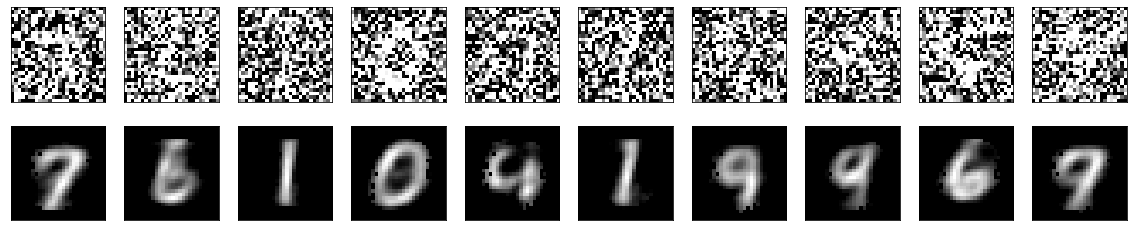

In [3]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(784)) 

#encoder
x = tf.keras.layers.Dense(128,activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128,activation='relu')(x)

#decoder
x=tf.keras.layers.Dense(128,activation='relu')(encoded)
decoded = tf.keras.layers.Dense(784,activation='relu')(x)

#Running our model
autoencoder = tf.keras.models.Model(input_img, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=adam, loss='mean_squared_error')
autoencoder.summary()


#Training the model
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#predicting using the test set
pred = autoencoder.predict(x_test_noisy)

#visualization
visualization(x_test_noisy,pred)

## **ADDING ONE LAYER**

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               1011

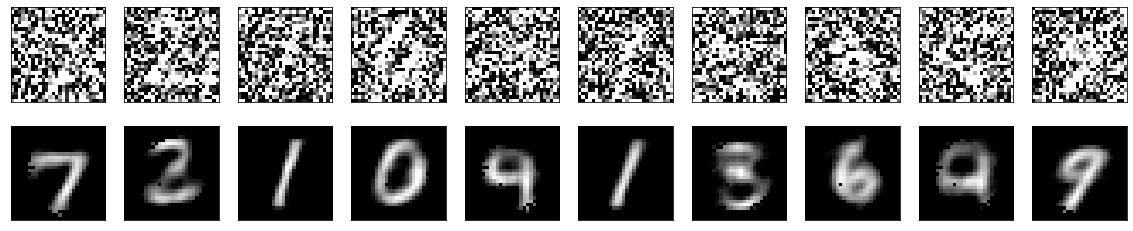

In [8]:
#defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(784)) 

#encoder
x = tf.keras.layers.Dense(128,activation='relu')(input_img)
x = tf.keras.layers.Dense(128,activation='relu')(x)
encoded = tf.keras.layers.Dense(128,activation='relu')(x)

#decoder
x = tf.keras.layers.Dense(128,activation='relu')(encoded)
x = tf.keras.layers.Dense(128,activation='relu')(x)
decoded = tf.keras.layers.Dense(784,activation='relu')(x)

#Running the model
autoencoder = tf.keras.models.Model(input_img, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=adam, loss='mean_squared_error')
autoencoder.summary()

#Training the model 
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#Predciting using test set
pred = autoencoder.predict(x_test_noisy)

#Visualization
visualization(x_test_noisy,pred)

## **ADDING 1 LAYER, CHANGING THE LEARNING RATE AND IMPLEMENTING SANDWICH DIMENSIONS**

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 784)               1011

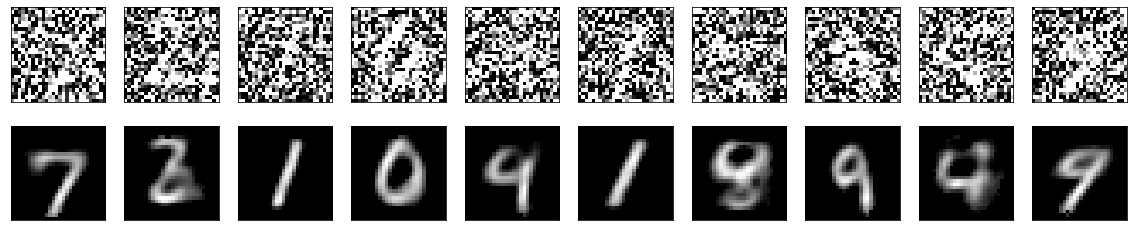

In [10]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(784))

#encoder
x = tf.keras.layers.Dense(128,activation='relu')(input_img)
x = tf.keras.layers.Dense(64,activation='relu')(x)
encoded = tf.keras.layers.Dense(32,activation='relu')(x)

#decoder
x = tf.keras.layers.Dense(64,activation='relu')(encoded)
x = tf.keras.layers.Dense(128,activation='relu')(x)
decoded = tf.keras.layers.Dense(784,activation='relu')(x)

#Running the model
autoencoder = tf.keras.models.Model(input_img, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=adam, loss='mean_squared_error')
autoencoder.summary()

#Training the model
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#Predicting using the test set
pred = autoencoder.predict(x_test_noisy)

#visualization
visualization(x_test_noisy,pred)

# **CNN ARCHITECTURE**

In [0]:
#visualization
def visualization(x_test_noisy,pred):
  number = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for index in range(number):
      # display original
      ax = plt.subplot(2, number, index + 1)
      plt.imshow(x_test_noisy[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, number, index + 1 + number)
      plt.imshow(pred[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

#Loading the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## **CNN BASE MODEL**

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

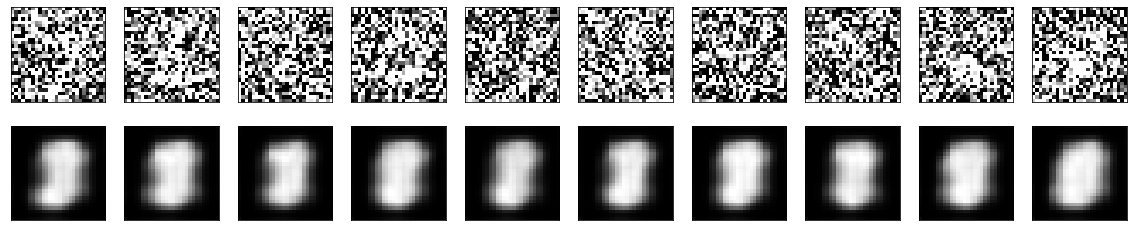

In [12]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

#encoder
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


#decoder
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


#Building the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


#Training the model
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#predicting using the test set
pred = autoencoder.predict(x_test_noisy)

#visualization
visualization(x_test_noisy,pred)

## **ADDING 1 LAYER AND CHANGING THE OPTIMIZER TO ADAM**

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

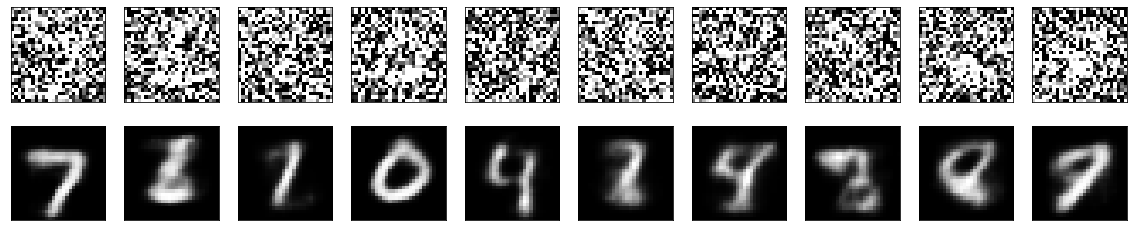

In [14]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

#encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#Building the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

#Training the model
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#predicting using the test set
pred = autoencoder.predict(x_test_noisy)

#visualization
visualization( x_test_noisy,pred)

## **CNN COMPLEX MODEL**

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 8)         3208      
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0  

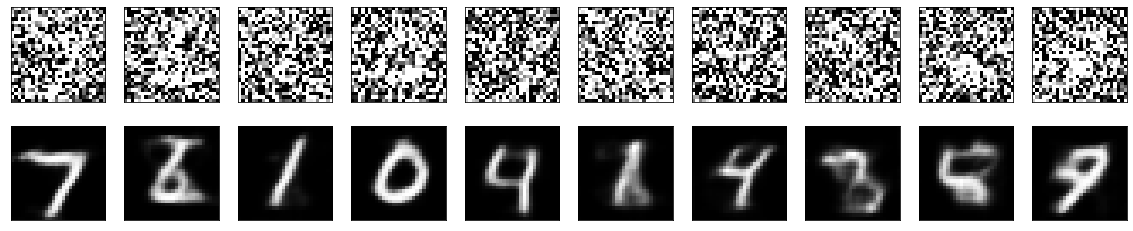

In [16]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

#encoder
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#Building the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


#Training the model
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#Predicting using the test set
pred = autoencoder.predict(x_test_noisy)

#visualizatoin
visualization(x_test_noisy,pred)